In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into testing and training

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# import random
# np.random.seed(42) # for reproducibility
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

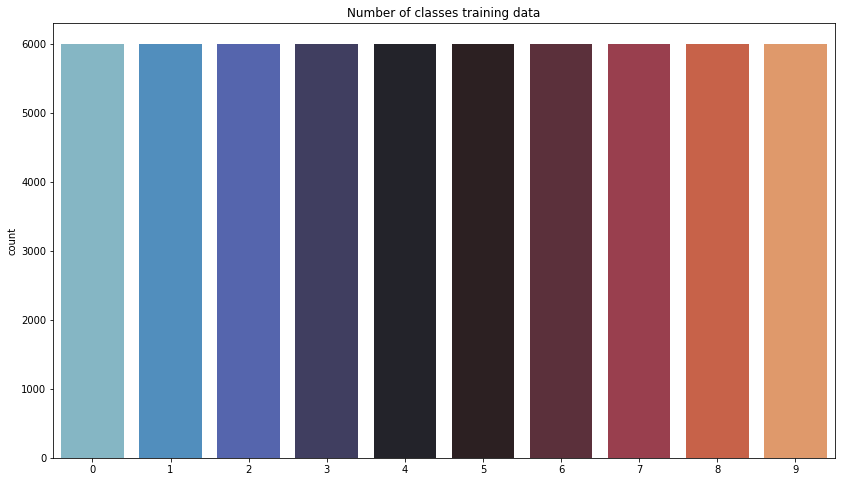

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(train_labels, palette="icefire")
plt.title("Number of classes training data")
plt.show()

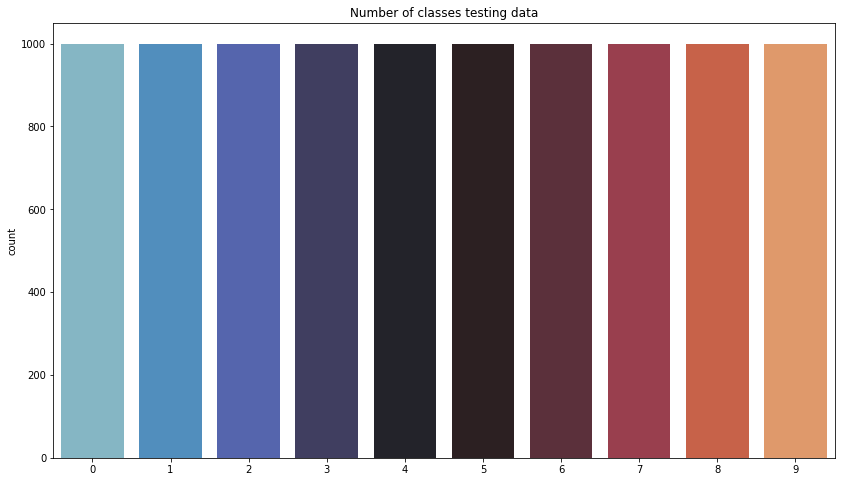

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(test_labels, palette="icefire")
plt.title("Number of classes testing data")
plt.show()

In [ ]:
# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

The random number of class 0 is: 39794


<Figure size 360x360 with 0 Axes>

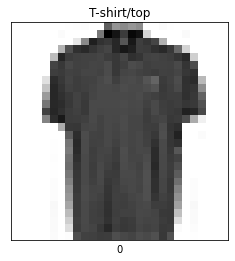

The random number of class 1 is: 12539


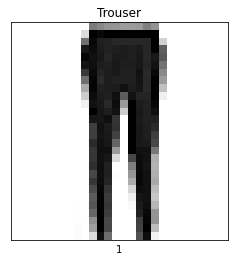

The random number of class 2 is: 58781


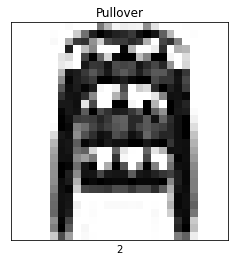

The random number of class 3 is: 56632


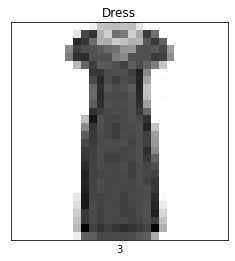

The random number of class 4 is: 5299


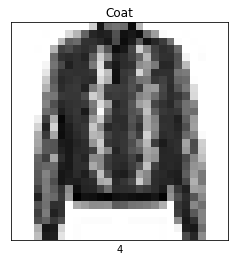

The random number of class 5 is: 21914


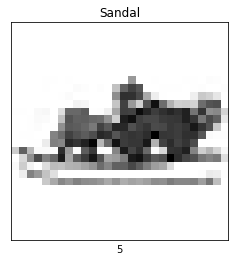

The random number of class 6 is: 54258


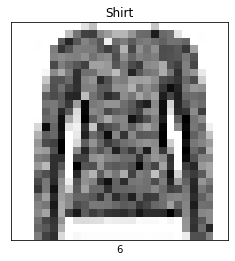

The random number of class 7 is: 770


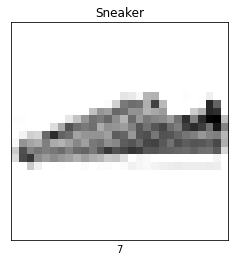

The random number of class 8 is: 41429


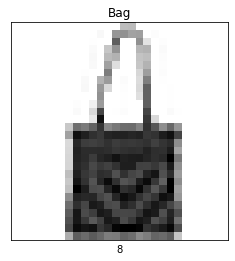

The random number of class 9 is: 14355


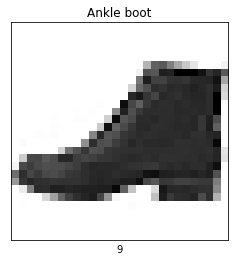

In [ ]:
import random
class_names = ["T-shirt/top", "Trouser", "Pullover","Dress", "Coat","Sandal", "Shirt", 
               "Sneaker", "Bag", "Ankle boot"]
img_list=[]
plt.figure(figsize=(5,5))
    
for j in range(10):
  for i in range(len(train_images)):
    if train_labels[i]==j:
      img_list.append(i) 
  # using random.randrange() to get a random number
  rand_idx = random.randrange(len(img_list))
  random_num = img_list[rand_idx]
  print("The random number of class",j,"is:",random_num)
  plt.figure(figsize=(4,4))
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[random_num], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[random_num]])
  plt.xlabel(train_labels[random_num])
  plt.show()
  img_list.clear()


In [ ]:
from keras.models import Sequential
import tensorflow as tf
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input  layer (1)
    keras.layers.Dense(392, activation='relu'),  # hidden layer (2)
    keras.layers.Dropout(0.6), 
    #keras.layers.Dense(196, activation='relu'),  # hidden layer (2)
    #keras.layers.Dropout(0.6),  # hidden layer (3)
    keras.layers.Dense(10, activation='softmax') # output layer (4)
])

In [ ]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [ ]:
history = model.fit(train_images, train_labels,  epochs = 32,  validation_data=(test_images, test_labels))

Epoch 1/32
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5944 - accuracy: 0.7855 - val_loss: 0.4593 - val_accuracy: 0.8310
Epoch 2/32
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4655 - accuracy: 0.8318 - val_loss: 0.4063 - val_accuracy: 0.8511
Epoch 3/32
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4371 - accuracy: 0.8414 - val_loss: 0.3849 - val_accuracy: 0.8625
Epoch 4/32
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4189 - accuracy: 0.8458 - val_loss: 0.3811 - val_accuracy: 0.8641
Epoch 5/32
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4035 - accuracy: 0.8517 - val_loss: 0.3812 - val_accuracy: 0.8641
Epoch 6/32
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3950 - accuracy: 0.8558 - val_loss: 0.3707 - val_accuracy: 0.8691
Epoch 7/32
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3832 - accuracy: 0.8591 - val_loss: 0.3670 - val_accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) 

print('Test accuracy:', test_acc)
print("Test loss:", test_loss)

313/313 - 1s - loss: 0.3520 - accuracy: 0.8832 - 576ms/epoch - 2ms/step
Test accuracy: 0.8831999897956848
Test loss: 0.35196974873542786


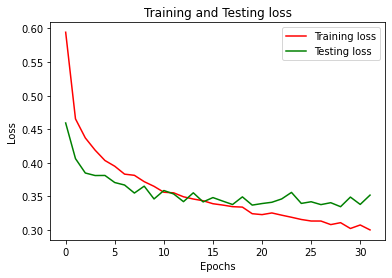

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2",color='r', label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2",color='g', label='Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

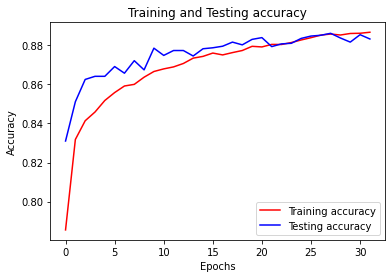

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2",color='r', label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2",color='b', label='Testing accuracy')

plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Pick a number: 65


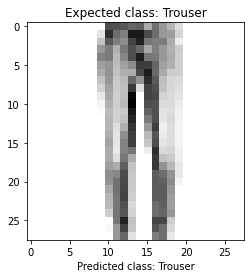

In [ ]:
def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  plt.figure()
  plt.imshow(image, cmap=plt.cm.binary)
  plt.title("Expected class: "+ class_names[correct_label])
  plt.xlabel("Predicted class: " + predicted_class)
  plt.grid(False)
  plt.show()

#Get the number between 0 and 1000 the number of Testing data
def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)



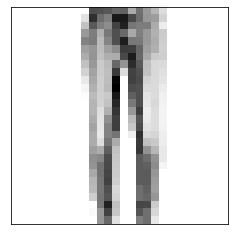

In [ ]:
# plot an original image
plt.gray() 
plt.imshow(test_images[65], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

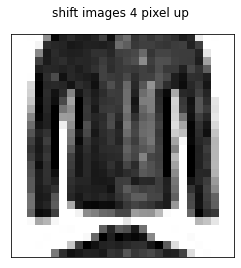

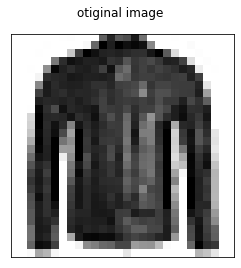

In [ ]:
test_all_up = [np.roll(x, -4, axis=0) for x in test_images]
plt.gray() 
plt.matshow(test_all_up[50], cmap=plt.cm.binary) 
plt.title("shift images 4 pixel up ")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.matshow(test_images[50], cmap=plt.cm.binary) 
plt.title("otiginal image ")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show() 

Pick a number: 385


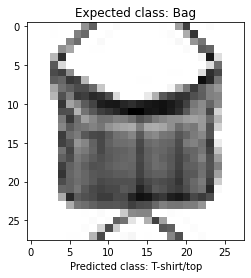

In [ ]:
def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  plt.figure()
  plt.imshow(image, cmap=plt.cm.binary)
  plt.title("Expected class: "+ class_names[correct_label])
  plt.xlabel("Predicted class: " + predicted_class)
  plt.grid(False)
  plt.show()

#Get the number between 0 and 1000 the number of Testing data
def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_all_up[num]
label = test_labels[num]
predict(model, image, label)

<Figure size 432x288 with 0 Axes>

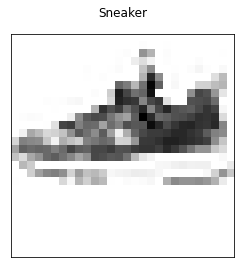

In [ ]:
# plot an original image
plt.gray() 
plt.matshow(test_all_up[160], cmap=plt.cm.binary) 
plt.title(class_names[test_labels[160]]) 
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [ ]:
#shift all test images 4 pixel up
test_all_up_images = [np.roll(x, -4, axis=0) for x in test_images]
test_all_up_images= np.array(test_all_up_images, dtype=np.float32)
test_all_up_images = test_all_up_images.astype("float") / 255.0
test_loss1, test_acc1 = model.evaluate(test_all_up_images,  test_labels, verbose=2) 

print('Test accuracy:', test_acc1)
print("Test loss:", test_loss1)

313/313 - 1s - loss: 2.3025 - accuracy: 0.0954 - 992ms/epoch - 3ms/step
Test accuracy: 0.09539999812841415
Test loss: 2.3025124073028564


In [ ]:
test_all_up_images.shape

(10000, 28, 28)